## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





% testa: 50.0082
% testa: [70.    44.    50.395]


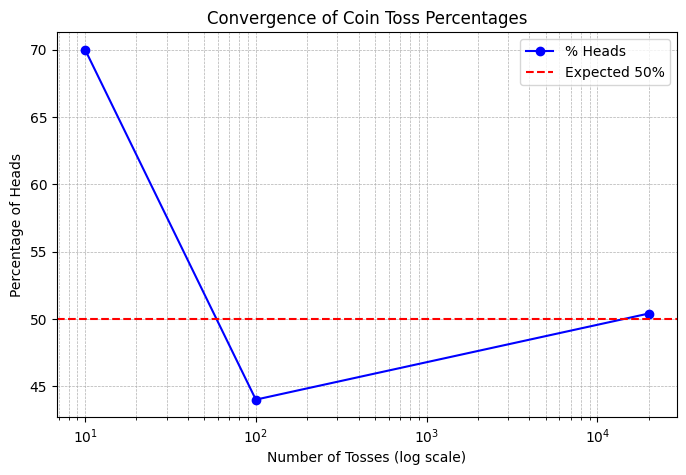

In [4]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

#1)
def coin_toss(times):
    
    data = []
    #0 -> croce
    #1 -> testa

    for _ in range(0, times):
        data.append(rn.randint(0,1))
    
    data_numpy = np.array(data)
    heads = np.sum(data_numpy == 1) 

    return (heads / data_numpy.size) * 100

print("% testa: {}".format(coin_toss(1000000)))

#2)
sample_sizes = np.array(sorted([100, 10, 20000]))
percentages = np.array([coin_toss(size) for size in sample_sizes])
print("% testa: {}".format(percentages))

#3)
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, percentages, marker='o', linestyle='-', color='blue', label='% Heads')
plt.axhline(y=50, color='red', linestyle='--', label='Expected 50%')
plt.xscale('log')
plt.xlabel('Number of Tosses (log scale)')
plt.ylabel('Percentage of Heads')
plt.title('Convergence of Coin Toss Percentages')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

(891, 12)
Na per colonna: [  0   0   0   0   0 177   0   0   0   0 687   2]
Ci sono righe duplicate
Età media per classe: [38.23344086 29.87763006 25.14061972]


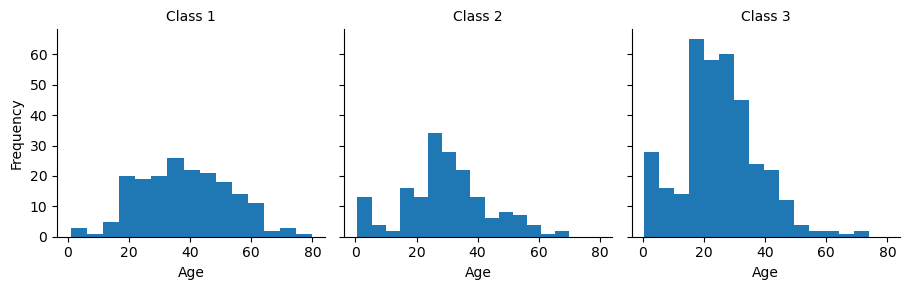

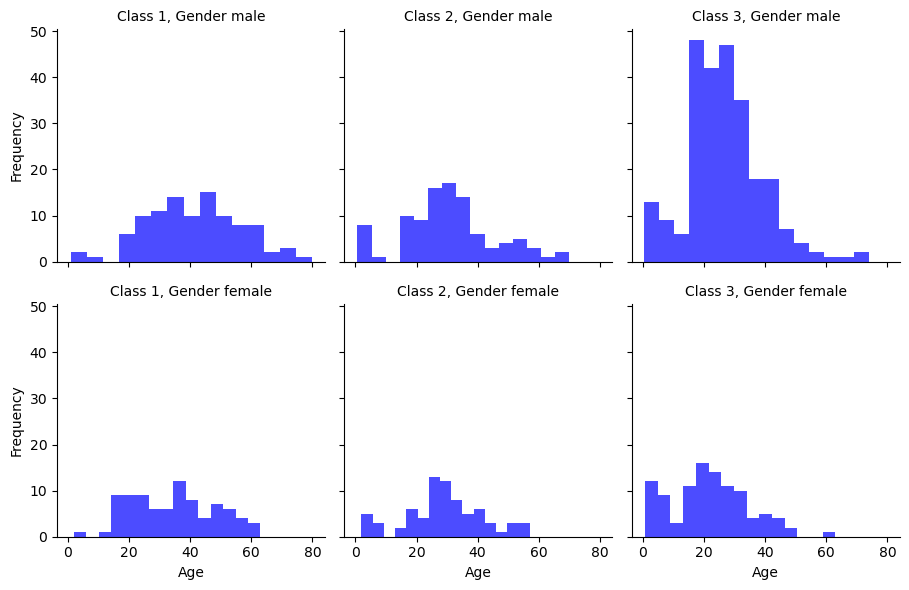

In [54]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

#1) 
print(df.shape)

#2)
na_list = [] 

for column in df.columns:
    na_list.append(df[column].isna().sum())

print("Na per colonna: {}".format(np.array(na_list)))

#3)
value = df["Embarked"].mode()
df.fillna(value)

#4)
df.dropna(subset=['Age'], inplace=True)

#5)
if(df.duplicated().sum()  ==  0):
    print("Ci sono righe duplicate")
else:
    print("Non ci sono righe duplicate")

#6)
df["Age"].fillna(df["Age"].mean())
print("Età media per classe: {}".format(np.array(df.groupby("Pclass")["Age"].mean())))

#7)
g = sns.FacetGrid(df, col="Pclass")
g.map(plt.hist, "Age", bins=15)

g.set_axis_labels("Age", "Frequency")
g.set_titles("Class {col_name}")

plt.show()

#8)
g = sns.FacetGrid(df, row="Sex", col="Pclass")
g.map(plt.hist, "Age", bins=15, color="blue", alpha=0.7)

g.set_axis_labels("Age", "Frequency")
g.set_titles("Class {col_name}, Gender {row_name}")

plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

Occorenze per ogni specie: [50 50 50]
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


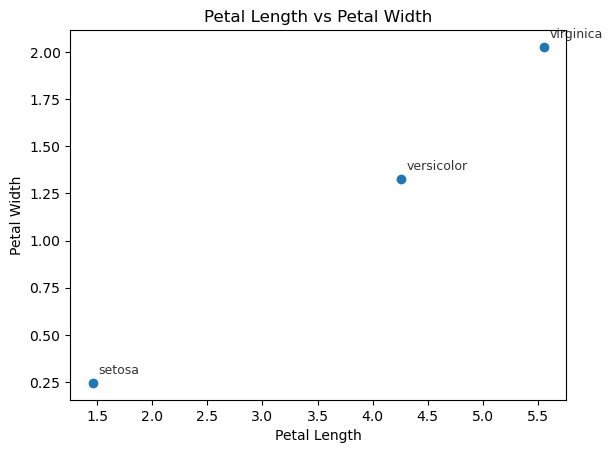

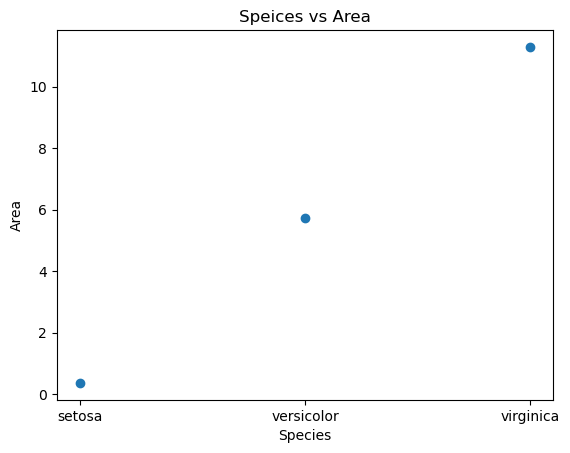

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

#1)
print("Occorenze per ogni specie: {}".format(np.array(df["species"].value_counts())))

#2)
grouped = df.groupby("species")[["petal_length", "petal_width"]].mean()
print(grouped)
#3)
plt.scatter(df.groupby("species")['petal_length'].mean(), df.groupby("species")['petal_width'].mean())

for species in grouped.index:
    plt.text(grouped["petal_length"][species] + 0.05,
             grouped["petal_width"][species] + 0.05,
             species,
             fontsize=9, alpha=0.8)

plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

#4)
df["area_value"] = df["petal_length"] * df["petal_width"]

#5)
grouped = df.groupby("species")["area_value"].mean()

plt.scatter(grouped.index, grouped.values)

plt.title('Speices vs Area')
plt.xlabel('Species')
plt.ylabel('Area')
plt.show()
